# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [52]:
# Descriptive Analysis->

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
rating_distribution = dict()
movieID_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')
    
    if columns[1] in movieID_count:
        movieID_count[columns[1]] += 1
    else:
        movieID_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1


for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))


movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")
movieID_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieID_name[int(columns[0])] = columns[1]

sorted_counted_data = sorted(movieID_count.items(), key = lambda x:x[1], reverse=True)[:17]
for movieID, count in sorted_counted_data:
    print(movieID_name[movieID], count)
                   
            


High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578
Men in Black (1997) 2538
Raiders of the Lost Ark (1981) 2514
Fargo (1996) 2513
Sixth Sense, The (1999) 2459
Braveheart (1995) 2443
Shakespeare in Love (1998) 2369
Princess Bride, The (1987) 2318


In [135]:
# Genre Insights->

movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")  
ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat") 
movieGEN_count = dict()
movieGEN_name = dict()
movieGEN_rating_sum = dict() 

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[1] in movieGEN_count:
        movieGEN_count[columns[1]] += 1
        movieGEN_rating_sum[columns[1]] += columns[2]
    else: 
        movieGEN_count[columns[1]] = 1
        movieGEN_rating_sum[columns[1]] = columns[2]

for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieGEN_name[int(columns[0])] = columns[2]

sorted_counted_data = sorted(movieGEN_count.items(), key=lambda x: x[1], reverse=True)[:40]
for movieGEN, count in sorted_counted_data:
    print(movieGEN_name[movieGEN], count)

print("\nAverage Ratings Across Genres:")
sorted_counted_data2 = sorted(movieGEN_rating_sum.items(), key=lambda x: x[1], reverse=True)[:40]
for movieGEN, total_rating in sorted_counted_data2:
    avg_rating = total_rating / movieGEN_count[movieGEN]
    print(f"{movieGEN_name[movieGEN]}: {avg_rating}")

movies.close()
ratings.close()


Comedy|Drama 3428
Action|Adventure|Fantasy|Sci-Fi 2991
Action|Adventure|Drama|Sci-Fi|War 2990
Action|Adventure|Romance|Sci-Fi|War 2883
Action|Adventure|Sci-Fi 2672
Action|Drama|War 2653
Action|Sci-Fi|Thriller 2649
Action|Sci-Fi|Thriller 2590
Comedy|Sci-Fi 2583
Drama|Thriller 2578
Action|Adventure|Comedy|Sci-Fi 2538
Action|Adventure 2514
Crime|Drama|Thriller 2513
Thriller 2459
Action|Drama|War 2443
Comedy|Romance 2369
Action|Adventure|Comedy|Romance 2318
Drama|War 2304
Crime|Film-Noir|Mystery|Thriller 2288
Comedy|Romance 2278
Children's|Drama|Fantasy|Sci-Fi 2269
Action|Adventure|Fantasy|Sci-Fi 2250
Comedy 2241
Drama 2227
Action|Crime|Drama 2223
Comedy|Romance|War 2194
Comedy|Horror 2181
Crime|Drama 2171
Action|Sci-Fi|Thriller 2098
Animation|Children's|Comedy 2077
Action|Horror|Sci-Fi|Thriller 2024
Action|Adventure|Sci-Fi|Thriller 1996
Action|Thriller 1995
Action|Drama 1924
Action|Sci-Fi|Thriller|War 1820
Film-Noir|Sci-Fi 1800
Adventure|Animation|Film-Noir 1799
Adventure|Comedy|Drama 178

In [136]:
# User Engagement Analysis->
# Identify the most active users (profession) based on the number of ratings they’ve given.

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
users = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\users.dat")
moviePRO_count = dict()
moviePRO_id = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[1] in moviePRO_count:
        moviePRO_count[columns[1]] += 1  
    else:
        moviePRO_count[columns[1]] = 1  

for line in users:
    line = line.strip()
    columns = line.split('::')
    moviePRO_id[int(columns[0])] = columns[3]  

sorted_counted_data = sorted(moviePRO_count.items(), key=lambda x: x[1], reverse=True)[:40]
for moviePRO, count in sorted_counted_data:
    print(f"User with occupation {moviePRO_id[moviePRO]} has given {count} ratings")

ratings.close()
users.close()


User with occupation 10 has given 3428 ratings
User with occupation 19 has given 2991 ratings
User with occupation 14 has given 2990 ratings
User with occupation 17 has given 2883 ratings
User with occupation 4 has given 2672 ratings
User with occupation 6 has given 2653 ratings
User with occupation 2 has given 2649 ratings
User with occupation 17 has given 2590 ratings
User with occupation 6 has given 2583 ratings
User with occupation 1 has given 2578 ratings
User with occupation 4 has given 2538 ratings
User with occupation 10 has given 2514 ratings
User with occupation 4 has given 2513 ratings
User with occupation 16 has given 2459 ratings
User with occupation 2 has given 2443 ratings
User with occupation 0 has given 2369 ratings
User with occupation 1 has given 2318 ratings
User with occupation 2 has given 2304 ratings
User with occupation 12 has given 2288 ratings
User with occupation 20 has given 2278 ratings
User with occupation 17 has given 2269 ratings
User with occupation 2 h

In [142]:
# User Engagement Analysis->
# Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
users = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\users.dat")
movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")
moviePRO_count = dict()
moviePRO_id = dict()
moviePRO_age = dict()
moviePRO_gender = dict()
moviePRO_avg_rating = dict()
movieGEN_rating = dict()



for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[1] in moviePRO_count:
        moviePRO_count[columns[1]] += 1  
    else:
        moviePRO_count[columns[1]] = 1  

    if columns[1] in moviePRO_avg_rating:
        moviePRO_avg_rating[columns[1]] += columns[2]
    else:
        moviePRO_avg_rating[columns[1]] = columns[2]
        

for line in users:
    line = line.strip()
    columns = line.split('::')
    moviePRO_id[int(columns[0])] = columns[3]  
    moviePRO_id[int(columns[0])] = columns[3]
    moviePRO_gender[int(columns[0])] = columns[1]
    moviePRO_age[int(columns[0])] = int(columns[2])

for columns[0] in moviePRO_avg_rating:
    moviePRO_avg_rating[columns[0]]/= moviePRO_count[columns[0]]

sorted_counted_data = sorted(moviePRO_count.items(), key=lambda x: x[1], reverse=True)[:10]

for columns[0], count in sorted_counted_data:
    avg_rating = moviePRO_avg_rating.get(columns[0], 0)
    print(f"User {columns[0]} (Occupation: {moviePRO_id[columns[0]]}, Age: {moviePRO_age[columns[0]]}, Gender: {moviePRO_gender[columns[0]]})")
    print(f"Ratings: {count}, Average Rating: {avg_rating:.2f}")

ratings.close()
users.close()


User 2858 (Occupation: 10, Age: 1, Gender: F)
Ratings: 3428, Average Rating: 4.32
User 260 (Occupation: 19, Age: 18, Gender: M)
Ratings: 2991, Average Rating: 4.45
User 1196 (Occupation: 14, Age: 18, Gender: F)
Ratings: 2990, Average Rating: 4.29
User 1210 (Occupation: 17, Age: 25, Gender: M)
Ratings: 2883, Average Rating: 4.02
User 480 (Occupation: 4, Age: 18, Gender: F)
Ratings: 2672, Average Rating: 3.76
User 2028 (Occupation: 6, Age: 45, Gender: M)
Ratings: 2653, Average Rating: 4.34
User 589 (Occupation: 2, Age: 18, Gender: M)
Ratings: 2649, Average Rating: 4.06
User 2571 (Occupation: 17, Age: 35, Gender: M)
Ratings: 2590, Average Rating: 4.32
User 1270 (Occupation: 6, Age: 25, Gender: M)
Ratings: 2583, Average Rating: 3.99
User 593 (Occupation: 1, Age: 50, Gender: F)
Ratings: 2578, Average Rating: 4.35


In [138]:
# Rating Distribution by Demographics->
#`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
users = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\users.dat")
moviePRO_count = dict()
moviePRO_id = dict()
moviePRO_age = dict()
moviePRO_gender = dict()
movieGEN_rating = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')[:2]))
    if columns[1] in moviePRO_count:
        moviePRO_count[columns[1]] += 1  
    else:
        moviePRO_count[columns[1]] = 1

for line in users:
    line = line.strip()
    columns = line.split('::') 
    moviePRO_id[int(columns[0])] = columns[3]
    moviePRO_gender[int(columns[0])] = columns[1]
    moviePRO_age[int(columns[0])] = int(columns[2])

sorted_counted_data = sorted(moviePRO_count.items(), key=lambda x: x[1], reverse=True)[:40]

print("Users Based on Ratings:")
for columns[0], count in sorted_counted_data:
    print(f"User {columns[0]}:")
    print(f"  Occupation: {moviePRO_id[columns[0]]}")
    print(f"  Age: {moviePRO_age[columns[0]]}")
    print(f"  Gender: {moviePRO_gender[columns[0]]}")
    print(f"  Ratings Given: {count}")

ratings.close()
users.close()





Users Based on Ratings:
User 2858:
  Occupation: 10
  Age: 1
  Gender: F
  Ratings Given: 3428
User 260:
  Occupation: 19
  Age: 18
  Gender: M
  Ratings Given: 2991
User 1196:
  Occupation: 14
  Age: 18
  Gender: F
  Ratings Given: 2990
User 1210:
  Occupation: 17
  Age: 25
  Gender: M
  Ratings Given: 2883
User 480:
  Occupation: 4
  Age: 18
  Gender: F
  Ratings Given: 2672
User 2028:
  Occupation: 6
  Age: 45
  Gender: M
  Ratings Given: 2653
User 589:
  Occupation: 2
  Age: 18
  Gender: M
  Ratings Given: 2649
User 2571:
  Occupation: 17
  Age: 35
  Gender: M
  Ratings Given: 2590
User 1270:
  Occupation: 6
  Age: 25
  Gender: M
  Ratings Given: 2583
User 593:
  Occupation: 1
  Age: 50
  Gender: F
  Ratings Given: 2578
User 1580:
  Occupation: 4
  Age: 18
  Gender: F
  Ratings Given: 2538
User 1198:
  Occupation: 10
  Age: 1
  Gender: M
  Ratings Given: 2514
User 608:
  Occupation: 4
  Age: 18
  Gender: M
  Ratings Given: 2513
User 2762:
  Occupation: 16
  Age: 50
  Gender: M
  Ra

In [139]:
# Rating Distribution by Demographics->
#`Are there specific genres preferred by certain age groups or occupations?`

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
users = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\users.dat")
movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")
movieGEN_count = dict()
moviePRO_id = dict()
moviePRO_age = dict()
movieGEN_name = dict()



for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[1] in movieGEN_count:
        movieGEN_count[columns[1]] += 1
    else:
        movieGEN_count[columns[1]] = 1

for line in users:
    line = line.strip()
    columns = line.split('::')
    moviePRO_id[int(columns[0])] = columns[3]
    moviePRO_age[int(columns[0])] = columns[2]

for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieGEN_name[int(columns[0])] = columns[2]


sorted_counted_data = sorted(movieGEN_count.items(), key=lambda x: x[1], reverse=True)[:40]

print("Specific Genres by user Demographic Attributes:\n")
for columns[0], count in sorted_counted_data:
    genre = movieGEN_name.get(columns[0], "Unknown Genre")
    print(f"Occupation: {moviePRO_id[columns[0]]}, Age: {moviePRO_age[columns[0]]}")
    print(f"Movie ID {columns[0]}: {genre}")

ratings.close()
users.close()
movies.close()


Specific Genres by user Demographic Attributes:

Occupation: 10, Age: 1
Movie ID 2858: Comedy|Drama
Occupation: 19, Age: 18
Movie ID 260: Action|Adventure|Fantasy|Sci-Fi
Occupation: 14, Age: 18
Movie ID 1196: Action|Adventure|Drama|Sci-Fi|War
Occupation: 17, Age: 25
Movie ID 1210: Action|Adventure|Romance|Sci-Fi|War
Occupation: 4, Age: 18
Movie ID 480: Action|Adventure|Sci-Fi
Occupation: 6, Age: 45
Movie ID 2028: Action|Drama|War
Occupation: 2, Age: 18
Movie ID 589: Action|Sci-Fi|Thriller
Occupation: 17, Age: 35
Movie ID 2571: Action|Sci-Fi|Thriller
Occupation: 6, Age: 25
Movie ID 1270: Comedy|Sci-Fi
Occupation: 1, Age: 50
Movie ID 593: Drama|Thriller
Occupation: 4, Age: 18
Movie ID 1580: Action|Adventure|Comedy|Sci-Fi
Occupation: 10, Age: 1
Movie ID 1198: Action|Adventure
Occupation: 4, Age: 18
Movie ID 608: Crime|Drama|Thriller
Occupation: 16, Age: 50
Movie ID 2762: Thriller
Occupation: 2, Age: 25
Movie ID 110: Action|Drama|War
Occupation: 0, Age: 18
Movie ID 2396: Comedy|Romance
Occ

In [118]:
# Top Performers->
# Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).


ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")
moviePRO_count = dict()
moviePRO_avg_rating = dict()
movieGEN_rating = dict
movieID_name = dict()
movieID_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[1] in moviePRO_count:
        moviePRO_count[columns[1]] += 1  
    else:
        moviePRO_count[columns[1]] = 1 
    if columns[1] in movieID_count:
        movieID_count[int(columns[1])] += 1
    else:
        movieID_count[int(columns[1])] = 1

    if columns[1] in moviePRO_avg_rating:
        moviePRO_avg_rating[columns[1]] += columns[2]
    else:
        moviePRO_avg_rating[columns[1]] = columns[2]

for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieID_name[int(columns[0])] = columns[1]
        

for columns[0] in moviePRO_avg_rating:
    moviePRO_avg_rating[columns[0]]/= moviePRO_count[columns[0]]

sorted_counted_data1 = sorted(moviePRO_count.items(), key=lambda x: x[1], reverse=True)
sorted_counted_data2 = sorted(movieID_count.items(), key = lambda x:x[1], reverse=True)
merged_sorted_data = sorted(set(sorted_counted_data1 + sorted_counted_data2), key=lambda x: x[1], reverse=True)[:20]


for movieID, count in merged_sorted_data:
    avg_rating = moviePRO_avg_rating.get(movieID, 0) 
    print(f"Movie ID: {movieID}")
    print(f"Movie Title: {movieID_name[movieID]}")
    print(f"Ratings: {count}, Average Rating: {avg_rating:.2f}")


ratings.close()
movies.close()


Movie ID: 2858
Movie Title: American Beauty (1999)
Ratings: 3428, Average Rating: 4.32
Movie ID: 260
Movie Title: Star Wars: Episode IV - A New Hope (1977)
Ratings: 2991, Average Rating: 4.45
Movie ID: 1196
Movie Title: Star Wars: Episode V - The Empire Strikes Back (1980)
Ratings: 2990, Average Rating: 4.29
Movie ID: 1210
Movie Title: Star Wars: Episode VI - Return of the Jedi (1983)
Ratings: 2883, Average Rating: 4.02
Movie ID: 480
Movie Title: Jurassic Park (1993)
Ratings: 2672, Average Rating: 3.76
Movie ID: 2028
Movie Title: Saving Private Ryan (1998)
Ratings: 2653, Average Rating: 4.34
Movie ID: 589
Movie Title: Terminator 2: Judgment Day (1991)
Ratings: 2649, Average Rating: 4.06
Movie ID: 2571
Movie Title: Matrix, The (1999)
Ratings: 2590, Average Rating: 4.32
Movie ID: 1270
Movie Title: Back to the Future (1985)
Ratings: 2583, Average Rating: 3.99
Movie ID: 593
Movie Title: Silence of the Lambs, The (1991)
Ratings: 2578, Average Rating: 4.35
Movie ID: 1580
Movie Title: Men in 

In [140]:
# Top Performers->
#Analyze the characteristics of top-rated movies (e.g., release year, genres).

from datetime import datetime

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")

moviePRO_count = {}  
moviePRO_avg_rating = {}  
movieID_name = {}  
movieID_latest_time = {}  

for line in ratings:
    line = line.strip()
    user_id, movie_id, rating, timestamp = map(int, line.split("::"))
    
    if movie_id in moviePRO_count:
        moviePRO_count[movie_id] += 1
        moviePRO_avg_rating[movie_id] += rating
    else:
        moviePRO_count[movie_id] = 1
        moviePRO_avg_rating[movie_id] = rating

    readable_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
    movieID_latest_time[movie_id] = readable_time

for line in movies:
    line = line.strip()
    movie_id, title, _ = line.split("::", 2)  
    movieID_name[int(movie_id)] = title

for movie_id in moviePRO_avg_rating:
    moviePRO_avg_rating[movie_id] /= moviePRO_count[movie_id]

top_movies = sorted(moviePRO_avg_rating.items(), key=lambda x: x[1], reverse=True)[:40]

print(f"{'Movie Title':<40} {'Ratings':<10} {'Avg Rating':<10} {'Latest Time':<20}")
print("-" * 80)
for movie_id, avg_rating in top_movies:
    title = movieID_name.get(movie_id, "Unknown")  
    rating_count = moviePRO_count.get(movie_id, 0)
    latest_time = movieID_latest_time.get(movie_id, "Unknown")
    print(f"{title:<40} {rating_count:<10} {avg_rating:<10.2f} {latest_time:<20}")


Movie Title                              Ratings    Avg Rating Latest Time         
--------------------------------------------------------------------------------
Baby, The (1973)                         1          5.00       2000-12-28 10:28:07 
Gate of Heavenly Peace, The (1995)       3          5.00       2000-10-25 03:09:46 
Schlafes Bruder (Brother of Sleep) (1995) 1          5.00       2000-11-20 09:47:47 
Follow the Bitch (1998)                  1          5.00       2000-10-25 07:27:20 
Bittersweet Motel (2000)                 1          5.00       2000-10-25 11:19:07 
Smashing Time (1967)                     2          5.00       2000-08-06 01:29:25 
Ulysses (Ulisse) (1954)                  1          5.00       2000-08-24 01:23:57 
Lured (1947)                             1          5.00       2000-06-13 23:49:52 
Song of Freedom (1936)                   1          5.00       2000-06-12 13:19:19 
One Little Indian (1973)                 1          5.00       2000-05-08 09:0

In [141]:
# Exploring Long Tail->
# Investigate the "long tail" of the dataset: How many movies receive very few ratings?
# What are the characteristics of these less-rated movies compared to popular ones?

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
movieID_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    
    if columns[1] in movieID_count:
        movieID_count[columns[1]] += 1
    else:
        movieID_count[columns[1]] = 1

movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")
movieID_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieID_name[int(columns[0])] = columns[1]

sorted_counted_data = sorted(movieID_count.items(), key = lambda x:x[1], reverse=False)[:40]
for movieID, count in sorted_counted_data:
    print(f"Movie Title : {movieID_name[movieID]}, Rating:{count}")

ratings.close()
movies.close()



Movie Title : Baby, The (1973), Rating:1
Movie Title : Diebinnen (1995), Rating:1
Movie Title : Mouth to Mouth (Boca a boca) (1995), Rating:1
Movie Title : Wend Kuuni (God's Gift) (1982), Rating:1
Movie Title : Bloody Child, The (1996), Rating:1
Movie Title : Small Faces (1995), Rating:1
Movie Title : Billy's Holiday (1995), Rating:1
Movie Title : For Ever Mozart (1996), Rating:1
Movie Title : Trois (2000), Rating:1
Movie Title : Open Season (1996), Rating:1
Movie Title : Fausto (1993), Rating:1
Movie Title : Harlem (1993), Rating:1
Movie Title : Running Free (2000), Rating:1
Movie Title : Hungarian Fairy Tale, A (1987), Rating:1
Movie Title : Telling You (1998), Rating:1
Movie Title : Boy Called Hate, A (1995), Rating:1
Movie Title : Loves of Carmen, The (1948), Rating:1
Movie Title : Bat Whispers, The (1930), Rating:1
Movie Title : Low Life, The (1994), Rating:1
Movie Title : Jar, The (Khomreh) (1992), Rating:1
Movie Title : Little Indian, Big City (Un indien dans la ville) (1994), R

In [125]:
# Exploring Long Tail->
# What are the characteristics of these less-rated movies compared to popular ones?

ratings = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")

movieID_name = dict()
movieID_count = dict()
moviePRO_avg_rating = dict() 

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
  
    if columns[1] in movieID_count:
        movieID_count[columns[1]] += 1
        moviePRO_avg_rating[columns[1]] += columns[2]
    else:
        movieID_count[columns[1]] = 1
        moviePRO_avg_rating[columns[1]] = columns[2]
       

for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieID_name[int(columns[0])] = columns[1]

moviePRO_avg_rating = {movie_id: moviePRO_avg_rating[movie_id] / movieID_count[movie_id] for movie_id in moviePRO_avg_rating}

less_rated_movies = sorted(movieID_count.items(), key=lambda x: x[1])[:20] 
high_rated_movies = sorted(movieID_count.items(), key=lambda x: x[1], reverse=True)[:20]  

print("\nLess-Rated Movies:")
for movieID, count in less_rated_movies:
    avg_rating = moviePRO_avg_rating.get(movieID, 0)  
    print(f"Movie Title: {movieID_name[movieID]}, Rating Count: {count}, Average Rating: {avg_rating:.2f}")

print("\nHigh-Rated Movies:")
for movieID, count in high_rated_movies:
    avg_rating = moviePRO_avg_rating.get(movieID, 0)  
    print(f"Movie Title: {movieID_name[movieID]}, Rating Count: {count}, Average Rating: {avg_rating:.2f}")

ratings.close()
movies.close()




Less-Rated Movies:
Movie Title: Baby, The (1973), Rating Count: 1, Average Rating: 5.00
Movie Title: Diebinnen (1995), Rating Count: 1, Average Rating: 1.00
Movie Title: Mouth to Mouth (Boca a boca) (1995), Rating Count: 1, Average Rating: 4.00
Movie Title: Wend Kuuni (God's Gift) (1982), Rating Count: 1, Average Rating: 4.00
Movie Title: Bloody Child, The (1996), Rating Count: 1, Average Rating: 1.00
Movie Title: Small Faces (1995), Rating Count: 1, Average Rating: 2.00
Movie Title: Billy's Holiday (1995), Rating Count: 1, Average Rating: 3.00
Movie Title: For Ever Mozart (1996), Rating Count: 1, Average Rating: 3.00
Movie Title: Trois (2000), Rating Count: 1, Average Rating: 2.00
Movie Title: Open Season (1996), Rating Count: 1, Average Rating: 3.00
Movie Title: Fausto (1993), Rating Count: 1, Average Rating: 3.00
Movie Title: Harlem (1993), Rating Count: 1, Average Rating: 2.00
Movie Title: Running Free (2000), Rating Count: 1, Average Rating: 4.00
Movie Title: Hungarian Fairy Tale

In [126]:
# Tag Analysis->
# Analyze the tags associated with movies. What are the most frequently used tags?
# Are tags consistent with movie genres?

movies = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")

genre_count = {}

for line in movies:
    line = line.strip()
    columns = line.split('::')  # Split data using '::'
    movie_genres = columns[2].split('|')  # Split genres by '|'
    
    for genre in movie_genres:
        genre_count[genre] = genre_count.get(genre, 0) + 1

sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

print("Most Frequently Used Genres:")
for genre, count in sorted_genres:
    print(f"{genre}: {count}")

movies.close()



Most Frequently Used Genres:
Drama: 1603
Comedy: 1200
Action: 503
Thriller: 492
Romance: 471
Horror: 343
Adventure: 283
Sci-Fi: 276
Children's: 251
Crime: 211
War: 143
Documentary: 127
Musical: 114
Mystery: 106
Animation: 105
Fantasy: 68
Western: 68
Film-Noir: 44


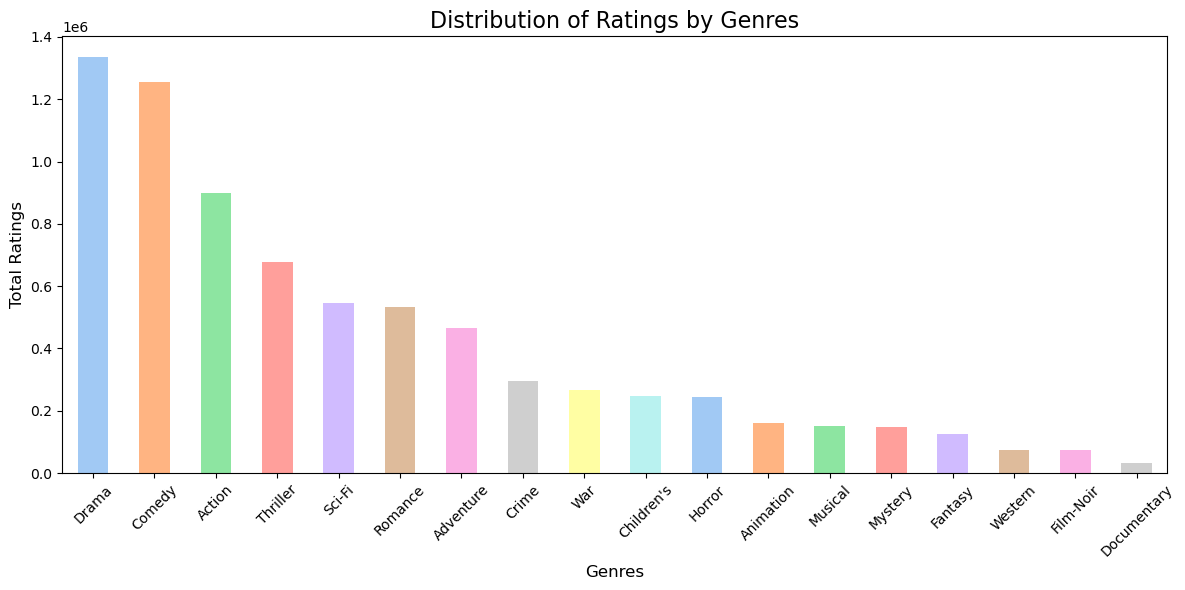

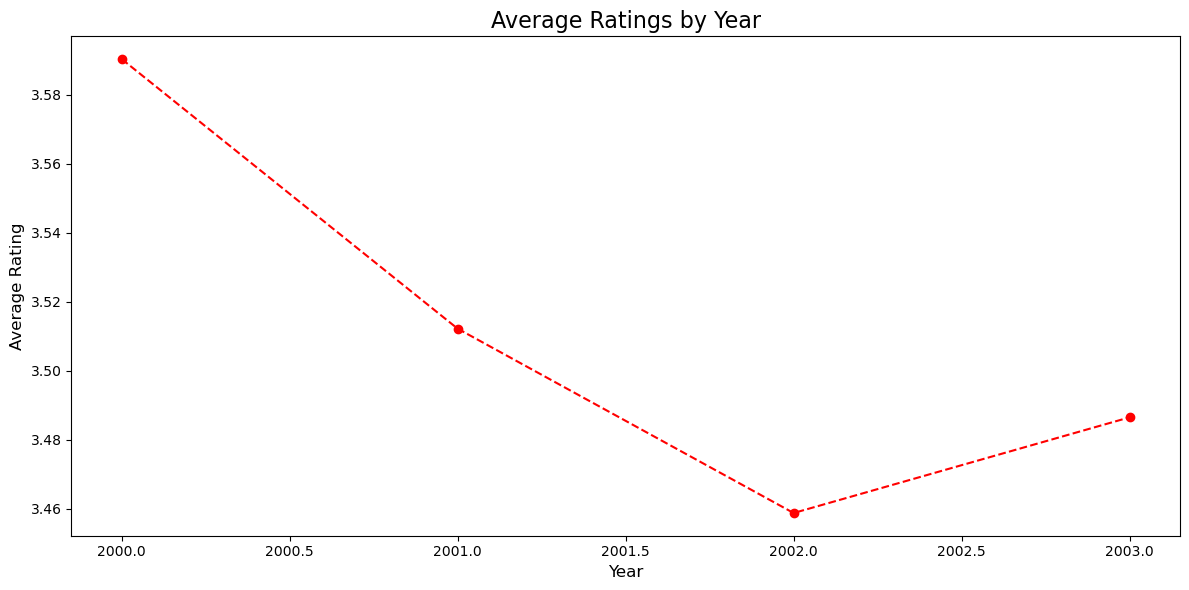

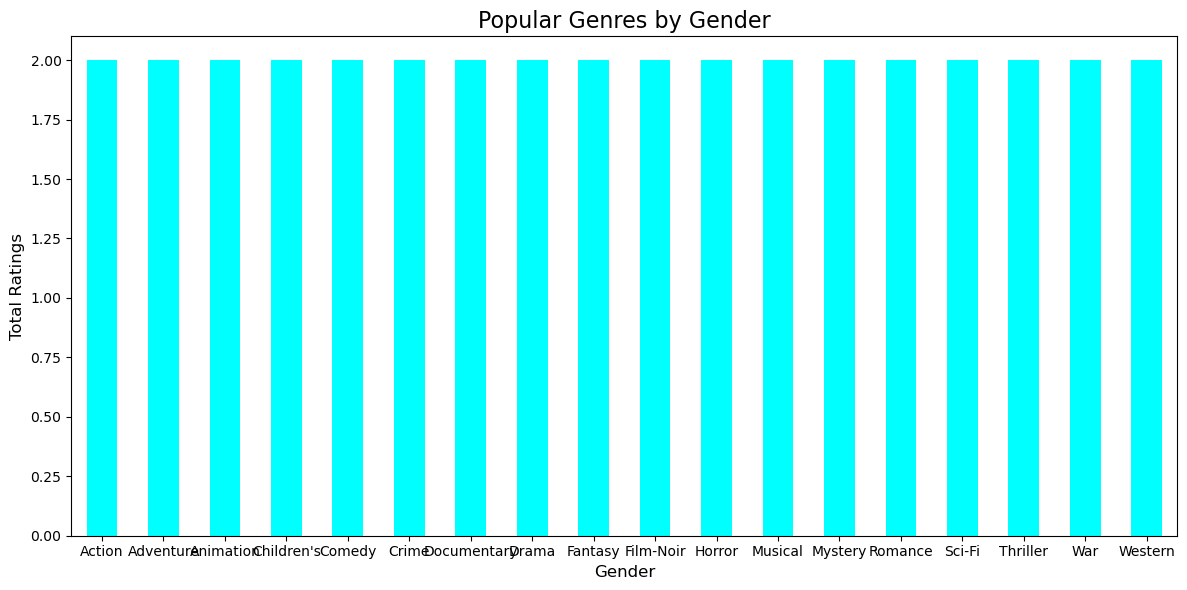

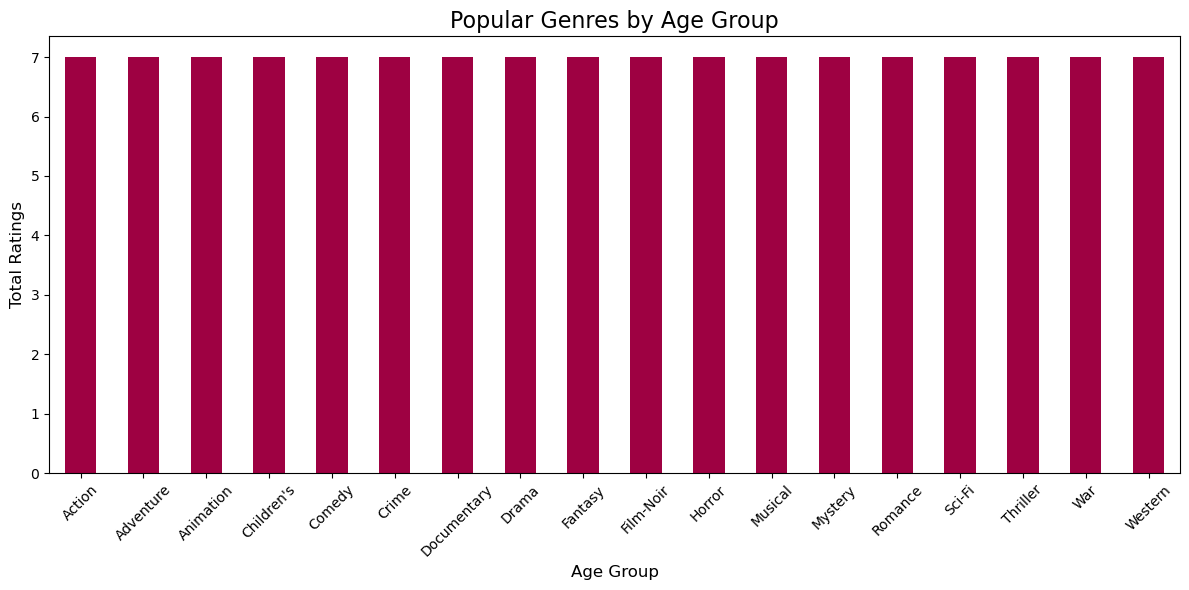

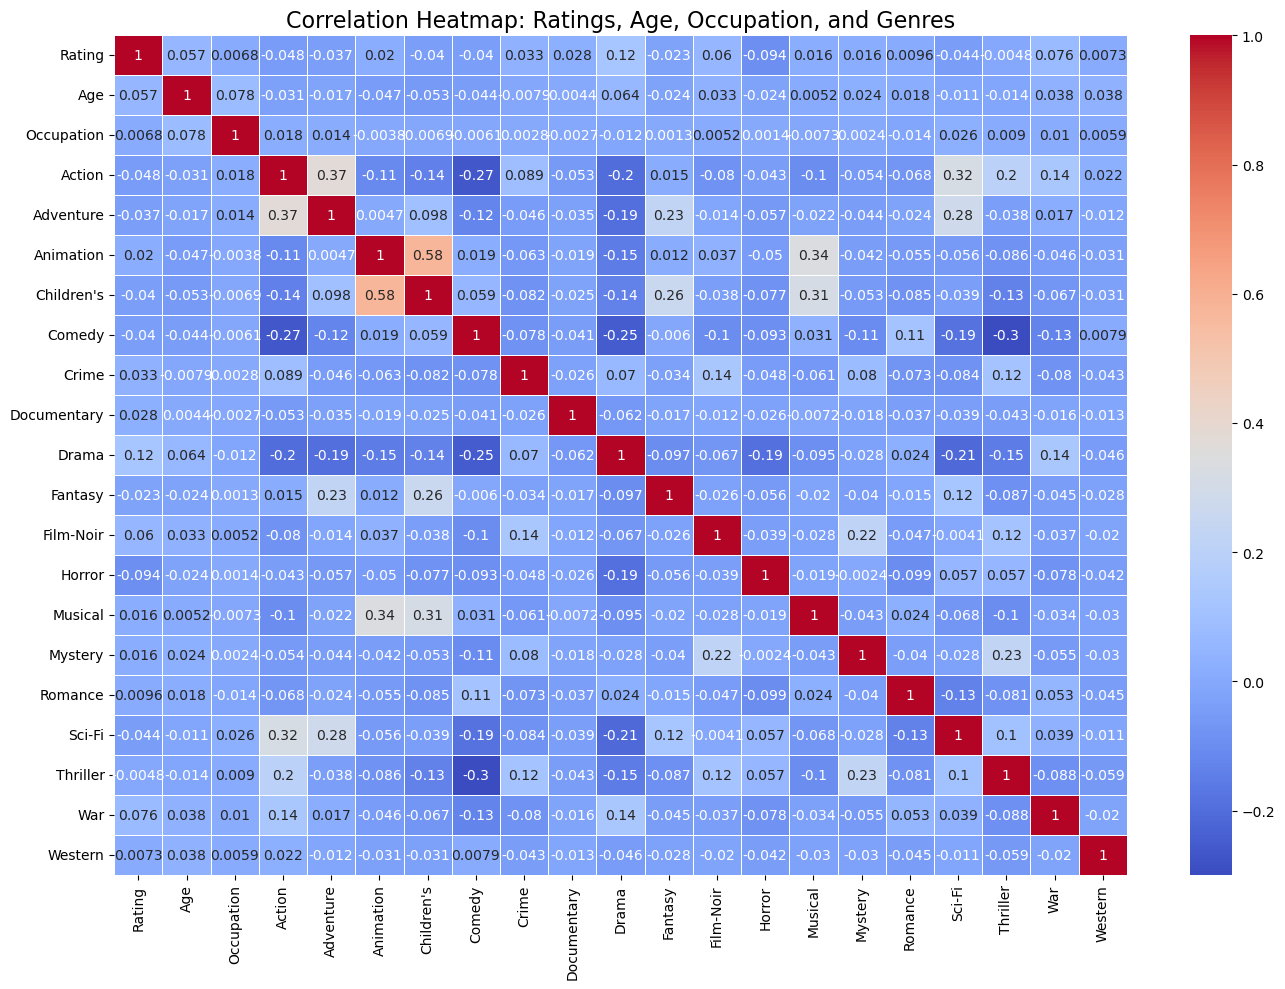

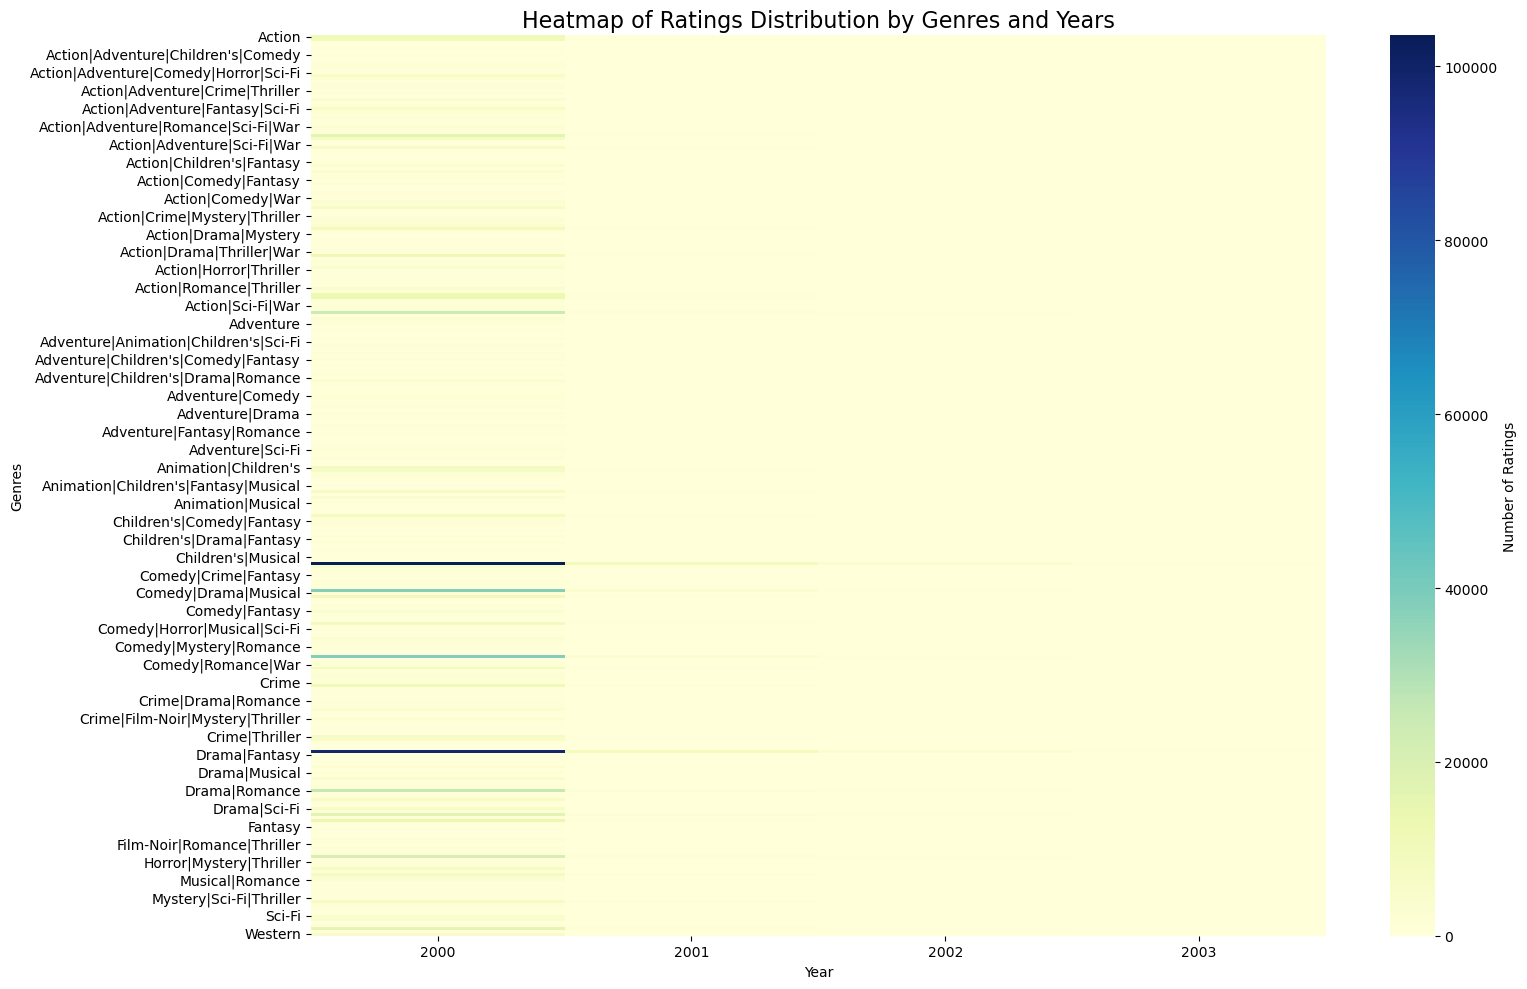

C:\Users\gawai\AppData\Local\Temp\ipykernel_27340\1162757547.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


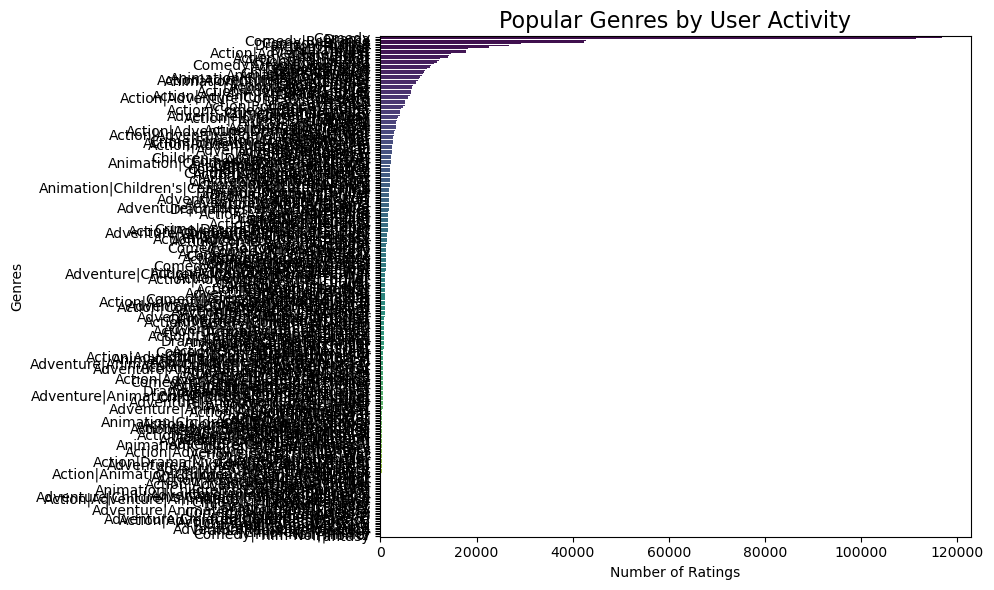

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Open the files
ratings_file = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\ratings.dat")
users_file = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\users.dat")
movies_file = open(r"C:\Users\gawai\OneDrive\Desktop\ml-1m\ml-1m\movies.dat")

# Load the datasets into pandas DataFrames
ratings = pd.read_csv(
    ratings_file, 
    sep='::', 
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'], 
    engine='python'
)

users = pd.read_csv(
    users_file, 
    sep='::', 
    names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'], 
    engine='python'
)

movies = pd.read_csv(
    movies_file, 
    sep='::', 
    names=['MovieID', 'Title', 'Genres'], 
    engine='python'
)

# Convert the timestamp to datetime
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Year'] = ratings['Timestamp'].dt.year

# Merge the datasets for analysis
merged_data = pd.merge(pd.merge(ratings, movies, on='MovieID'), users, on='UserID')

# Extract release year from the movie title
merged_data['ReleaseYear'] = merged_data['Title'].str.extract(r'\((\d{4})\)').astype(float)

# One-hot encode genres for analysis
genres_dummies = merged_data['Genres'].str.get_dummies('|')

# 1. Distribution of Ratings by Genres
plt.figure(figsize=(12, 6))
genre_ratings = genres_dummies.multiply(merged_data['Rating'], axis=0).sum().sort_values(ascending=False)
genre_ratings.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution of Ratings by Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ratings by Year
plt.figure(figsize=(12, 6))
merged_data.groupby('Year')['Rating'].mean().plot(kind='line', color='red', linestyle='--', marker='o')
plt.title('Average Ratings by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Popular Genres by Gender
plt.figure(figsize=(12, 6))
gender_genre = merged_data.groupby('Gender')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()
gender_genre.plot(kind='bar', stacked=True, colormap='cool')
plt.title('Popular Genres by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Popular Genres by Age Group
age_groups = {
    1: 'Under 18', 
    18: '18-24', 
    25: '25-34', 
    35: '35-44', 
    45: '45-49', 
    50: '50-55', 
    56: '56+'
}
merged_data['AgeGroup'] = merged_data['Age'].map(age_groups)

age_genre = merged_data.groupby('AgeGroup')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()

plt.figure(figsize=(12, 6))
age_genre.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Popular Genres by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
numerical_columns = ['Rating', 'Age', 'Occupation']
correlation_data = pd.concat([merged_data[numerical_columns], genres_dummies], axis=1)
corr_matrix = correlation_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

numerical_columns = ['Rating', 'Age', 'Occupation']
correlation_data = pd.concat([merged_data[numerical_columns], genres_dummies], axis=1)
corr_matrix = correlation_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap: Ratings, Age, Occupation, and Genres", fontsize=16)
plt.tight_layout()
plt.show()

# 6. Heatmap of Ratings Distribution by Genres and Years
genre_year_pivot = merged_data.pivot_table(
    index='Genres', 
    columns='Year', 
    values='Rating', 
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(
    genre_year_pivot, 
    cmap='YlGnBu', 
    annot=False, 
    cbar_kws={'label': 'Number of Ratings'}
)
plt.title('Heatmap of Ratings Distribution by Genres and Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

# 7. Popular Genres by User Activity
genre_popularity = merged_data.groupby('Genres')['Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    y=genre_popularity.index, 
    x=genre_popularity.values, 
    palette='viridis'
)
plt.title('Popular Genres by User Activity', fontsize=16)
plt.xlabel('Number of Ratings')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

